STUDENTS PERFORMANCE      USING LINEAR

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


loading data

In [42]:
df = pd.read_excel(r"C:\Users\Student\Desktop\WITU COHORT 3 (3)\YEAR ONE\SEMITER TWO\INTERMEDIATE DS and ML\linear regression\exams.xlsx")
print(df)

    gender race/ethnicity parental level of education         lunch  \
0   female        group D                some college      standard   
1     male        group D          associate's degree      standard   
2   female        group D                some college  free/reduced   
3     male        group B                some college  free/reduced   
4   female        group D          associate's degree      standard   
..     ...            ...                         ...           ...   
80  female        group D                 high school      standard   
81    male        group A            some high school  free/reduced   
82  female        group D                 high school      standard   
83  female        group E                 high school      standard   
84    male        group C             master's degree      standard   

   test preparation course  math score  reading score  writing score  
0                completed          59             70             78  
1    

• Gender: The gender of the student (male/female)

• Race/ethnicity: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)

• Parental level of education: The highest level of education attained by the student's parent(s) or guardian(s)

• Lunch: Whether the student receives free or reduced-price lunch (yes/no)

• Test preparation course: Whether the student completed a test preparation course (yes/no)

• Math score: The student's score on a standardized mathematics test

• Reading score: The student's score on a standardized reading test

• Writing score: The student's score on a standardized writing test

This dataset could be used for various research questions related to education, such as examining the impact of parental education or test preparation courses on student performance. It could also be used to develop machine learning models to predict student performance based on demographic and other factors.


Extract the dependent variable (math score) and independent variables (other features):

In [43]:
X = df.drop(columns="math score",axis=1)
y = df["math score"]
print(X)


    gender race/ethnicity parental level of education         lunch  \
0   female        group D                some college      standard   
1     male        group D          associate's degree      standard   
2   female        group D                some college  free/reduced   
3     male        group B                some college  free/reduced   
4   female        group D          associate's degree      standard   
..     ...            ...                         ...           ...   
80  female        group D                 high school      standard   
81    male        group A            some high school  free/reduced   
82  female        group D                 high school      standard   
83  female        group E                 high school      standard   
84    male        group C             master's degree      standard   

   test preparation course  reading score  writing score  
0                completed             70             78  
1                     none   

In [44]:
print(y)

0     59
1     96
2     57
3     70
4     83
      ..
80    58
81    59
82    77
83    61
84    85
Name: math score, Length: 85, dtype: int64


EXTRACTING OF A PRIMARY INFORMATION 4RM ADATASET

In [45]:
df.shape

(85, 8)

In [46]:
type(df)

pandas.core.frame.DataFrame

In [47]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


DATA CLEANING

Drop unnecessary columns

In [48]:
df_dropped = df.drop(['race/ethnicity', 'lunch'], axis=1)
print(df_dropped)

    gender parental level of education test preparation course  math score  \
0   female                some college               completed          59   
1     male          associate's degree                    none          96   
2   female                some college                    none          57   
3     male                some college                    none          70   
4   female          associate's degree                    none          83   
..     ...                         ...                     ...         ...   
80  female                 high school                    none          58   
81    male            some high school               completed          59   
82  female                 high school                    none          77   
83  female                 high school                    none          61   
84    male             master's degree                    none          85   

    reading score  writing score  
0              70           

 Check for missing values

In [49]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Drop rows with missing values

In [50]:
drop_missing_values =df.dropna(inplace=True)
print(drop_missing_values)

None


 Remove duplicate rows

In [51]:
duplicate =df.drop_duplicates(inplace=True)
print(duplicate)

None


Convert data types if necessary

In [52]:
df_encoded = pd.get_dummies(df_dropped, columns=['gender', 'parental level of education', 'test preparation course'])
print(df_encoded.head())

   math score  reading score  writing score  gender_female  gender_male  \
0          59             70             78           True        False   
1          96             93             87          False         True   
2          57             76             77           True        False   
3          70             70             63          False         True   
4          83             85             86           True        False   

   parental level of education_associate's degree  \
0                                           False   
1                                            True   
2                                           False   
3                                           False   
4                                            True   

   parental level of education_bachelor's degree  \
0                                          False   
1                                          False   
2                                          False   
3                     

EXPLORATORY DATA ANALYSIS(EDA)

Structure of dataset

In [53]:
# Display basic information about the dataset
print(df_dropped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       85 non-null     object
 1   parental level of education  85 non-null     object
 2   test preparation course      85 non-null     object
 3   math score                   85 non-null     int64 
 4   reading score                85 non-null     int64 
 5   writing score                85 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 4.1+ KB
None


In [54]:
#Summary statistics of numerical columns
print(df_dropped.describe())


       math score  reading score  writing score
count   85.000000       85.00000      85.000000
mean    67.788235       71.00000      69.835294
std     13.728745       13.63469      14.175639
min     35.000000       40.00000      38.000000
25%     58.000000       61.00000      57.000000
50%     66.000000       71.00000      70.000000
75%     77.000000       81.00000      80.000000
max    100.000000       98.00000      99.000000


C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

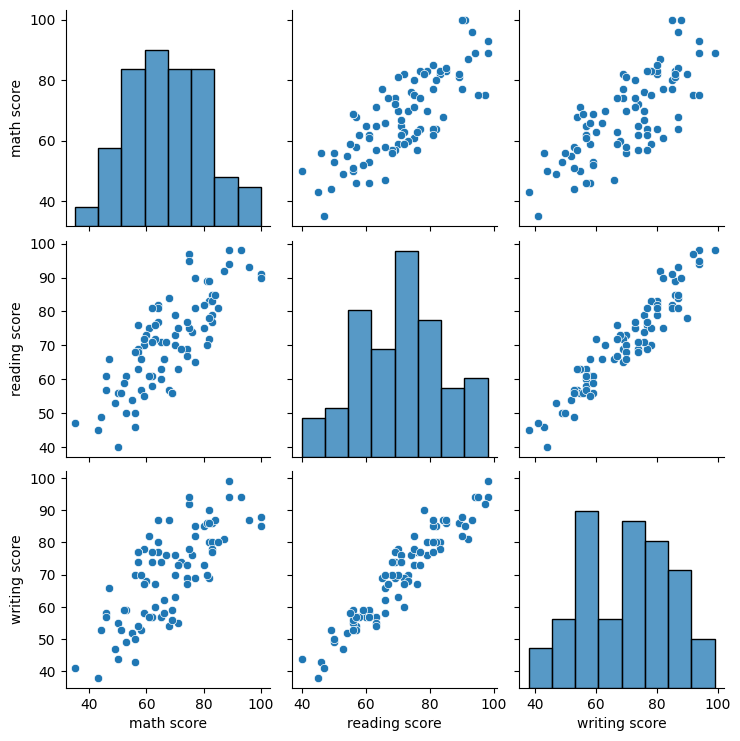

In [55]:
#Pairplot for numerical variables
sns.pairplot(df_dropped)
plt.show()


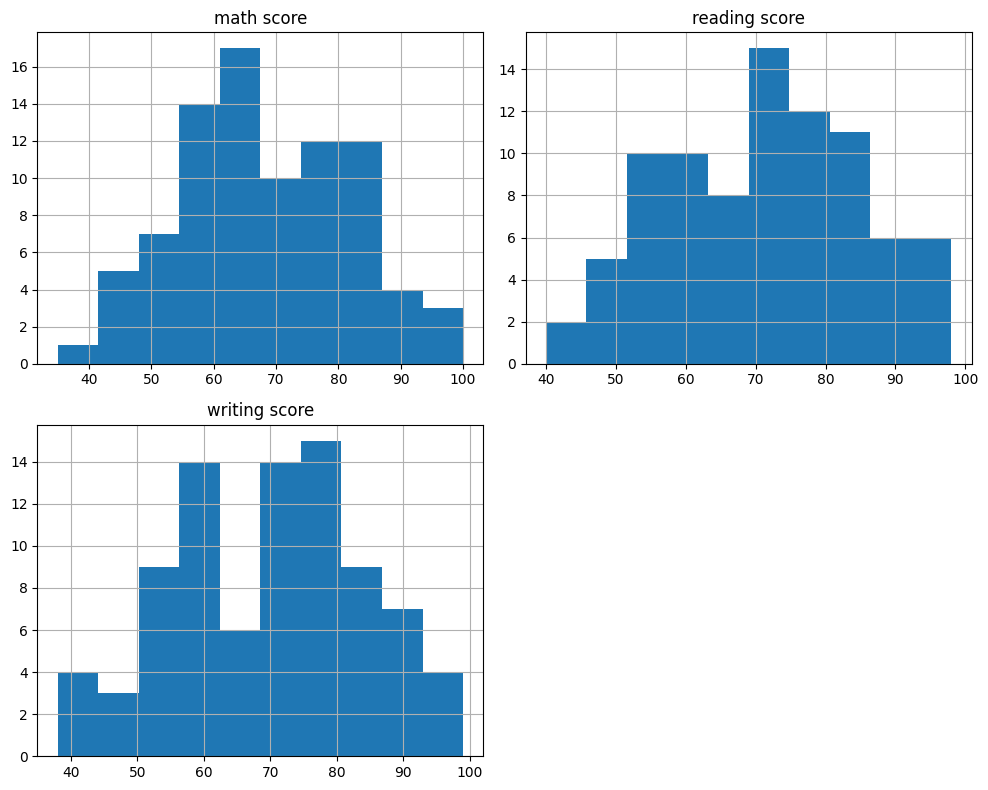

In [56]:
# Distribution of numerical variables
df_dropped.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

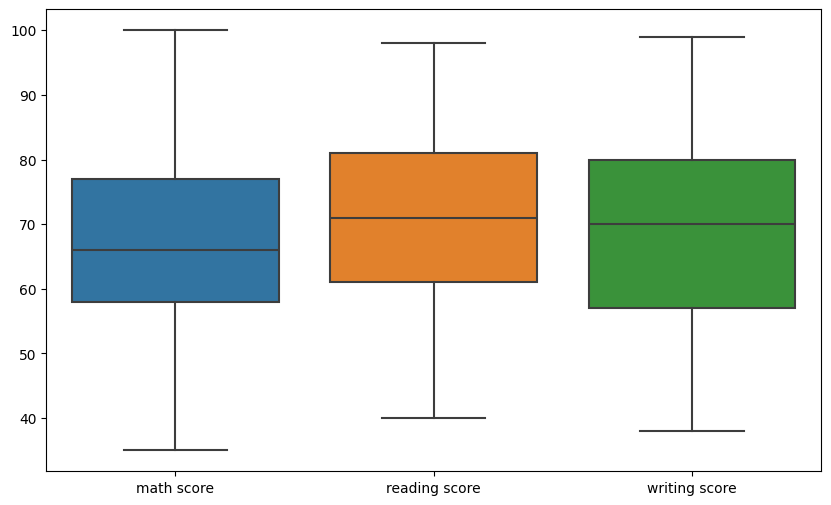

In [57]:
#Boxplot for each numerical variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dropped)
plt.show()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

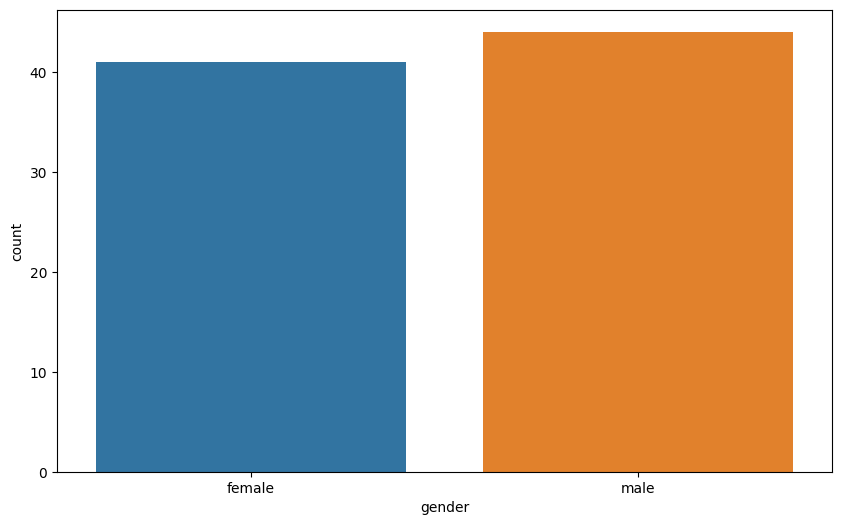

In [58]:
 #Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df_dropped)
plt.show()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

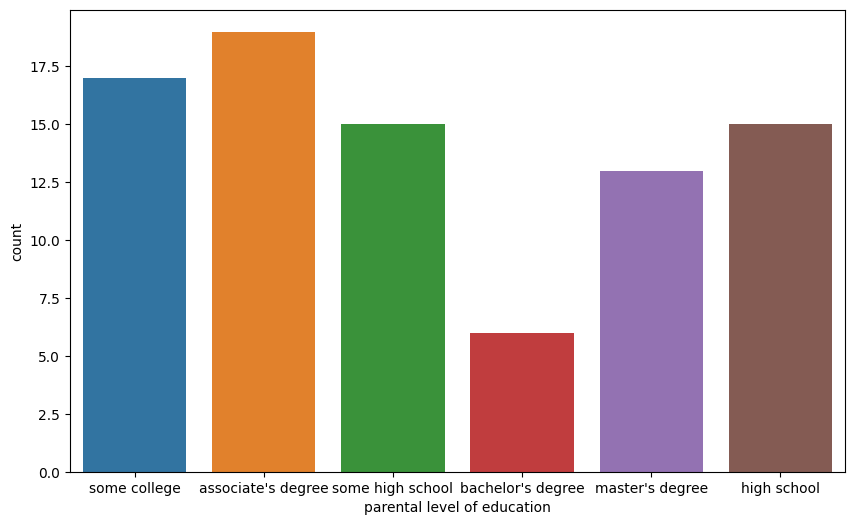

In [59]:
#Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', data=df_dropped)
plt.show()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

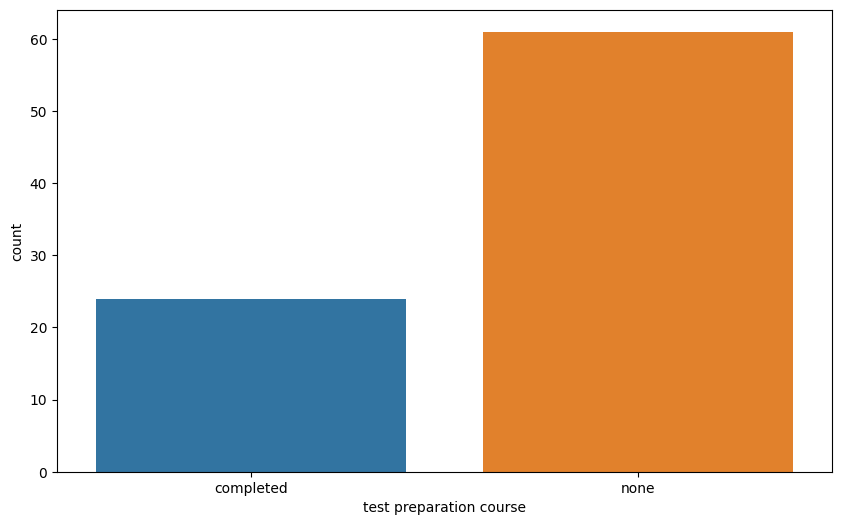

In [60]:
#Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='test preparation course', data=df_dropped)
plt.show()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

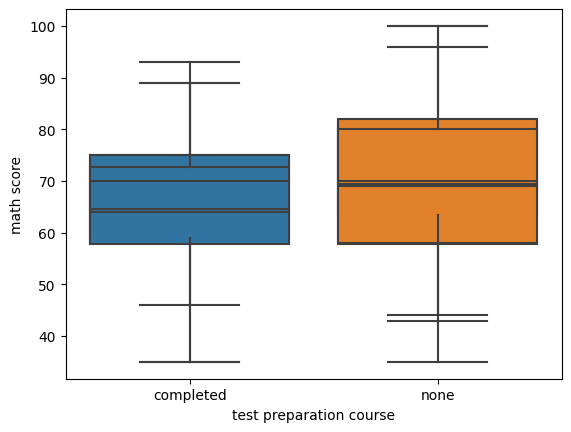

In [61]:
# Visualize the relationship between continuous and categorical variables using box plots
sns.boxplot(x='gender', y='math score', data=df_dropped)
sns.boxplot(x='parental level of education', y='math score', data=df_dropped)
sns.boxplot(x='test preparation course', y='math score', data=df_dropped)
plt.show()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

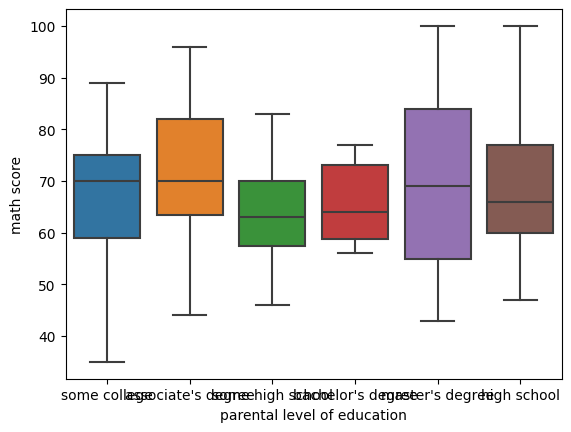

In [62]:
# Visualize the relationship between continuous and categorical variables using box plots
sns.boxplot(x='parental level of education', y='math score', data=df_dropped)
plt.show()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

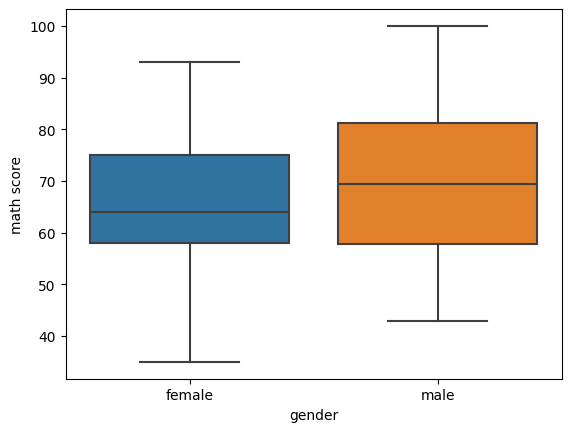

In [63]:
# Visualize the relationship between continuous and categorical variables using box plots
sns.boxplot(x='gender', y='math score', data=df_dropped)
plt.show()

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

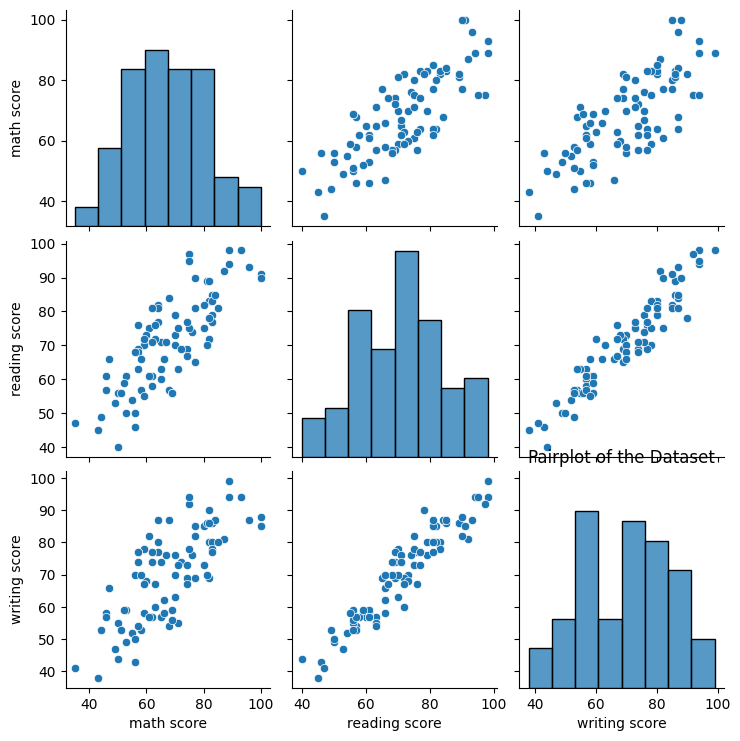

In [64]:
# Visualize patterns and trends using seaborn pairplot
sns.pairplot(df_dropped)
plt.title('Pairplot of the Dataset')
plt.show()


DATA SPLITING 


need explanations

In [70]:
X = df.drop(columns=['math score', 'reading score', 'writing score'])  # Features
y = df[['math score', 'reading score', 'writing score']]  # Target variables

In [66]:
# Split the dataset into training and testing sets
# Here, we'll allocate 80% of the data to the training set and 20% to the testing set
# You can adjust the test_size parameter to change the proportion of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (68, 5) (68, 3)
Testing set shape (X, y): (17, 5) (17, 3)


In [75]:
# Initialize the Linear Regression model
model = LinearRegression()

In [73]:
# Train the model
model.fit(X, y)

ValueError: could not convert string to float: 'female'